<a href="https://colab.research.google.com/github/smitamadhu98/Store-Analysis/blob/master/Store_Sales_Analysis_Structured_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Store Sales Analysis

## Objective
Analyze store-level sales data to understand trends, patterns, and factors influencing sales.

## Dataset Overview
The dataset contains features like store information, promotions, holidays, and weekly sales data.

## Workflow
1. Load and explore the dataset
2. Preprocess the data
3. Perform exploratory data analysis
4. Apply statistical or ML models
5. Draw conclusions

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Load the Dataset'
path = '/features.csv'

#read the dataset
import pandas as pd
data = pd.read_csv(path)
print(data)

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        

## Data Preprocessing
- Convert date to datetime
- Handle missing values
- Encode categorical variables

In [ ]:
# Convert 'Date' to datetime

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
print("Date column converted to datetime. Sample values:")
print(data['Date'].head())


# Fill or drop missing values based on context
print(  )
print('Missing values before handling')
print(data.isnull().sum())

# Drop rows where Date is missing for handling
print(  )
data1 = data.dropna()
print('After handling missing values ')
data1.isnull().sum()
print(data1.head())

# Encode Categorial Values
print(  )
print('Categorial values as below')
data.nunique().head(10)

Date column converted to datetime. Sample values:
0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]

Missing values before handling
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

After handling missing values 
    Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
92      1 2011-11-11        59.11       3.297   10382.90    6115.67   
93      1 2011-11-18        62.25       3.308    6074.12     254.39   
94      1 2011-11-25        60.14       3.236     410.31      98.00   
95      1 2011-12-02        48.91       3.172    5629.51      68.00   
96      1 2011-12-09        43.93       3.158    4640.65      19.00   

    MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
92     215

,0
Store,45
Date,182
Temperature,4178
Fuel_Price,1011
MarkDown1,4023
MarkDown2,2715
MarkDown3,2885
MarkDown4,3405
MarkDown5,4045
CPI,2505


## Exploratory Data Analysis

In [34]:
# Weekly Sales distribution

# ==========================
# Exploratory Data Analysis (EDA) - Weekly Sales Distribution
# ==========================

import matplotlib.pyplot as plt
import seaborn as sns

# Check that df exists
print("Type of df before EDA:", type(data))

# 1. Weekly Sales Distribution
if 'Weekly_Sales' in data.columns:
    print("\n----- SALES DISTRIBUTION -----")
    plt.figure(figsize=(8,6))
    sns.histplot(data['Weekly_Sales'], bins=40, kde=True)
    plt.title("Distribution of Weekly Sales")
    plt.xlabel("Weekly Sales")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("Column 'Weekly_Sales' not found in df")


Type of df before EDA: <class 'pandas.core.frame.DataFrame'>
Column 'Weekly_Sales' not found in df


Type of df before EDA: <class 'pandas.core.frame.DataFrame'>
----- CORRELATION HEATMAP -----


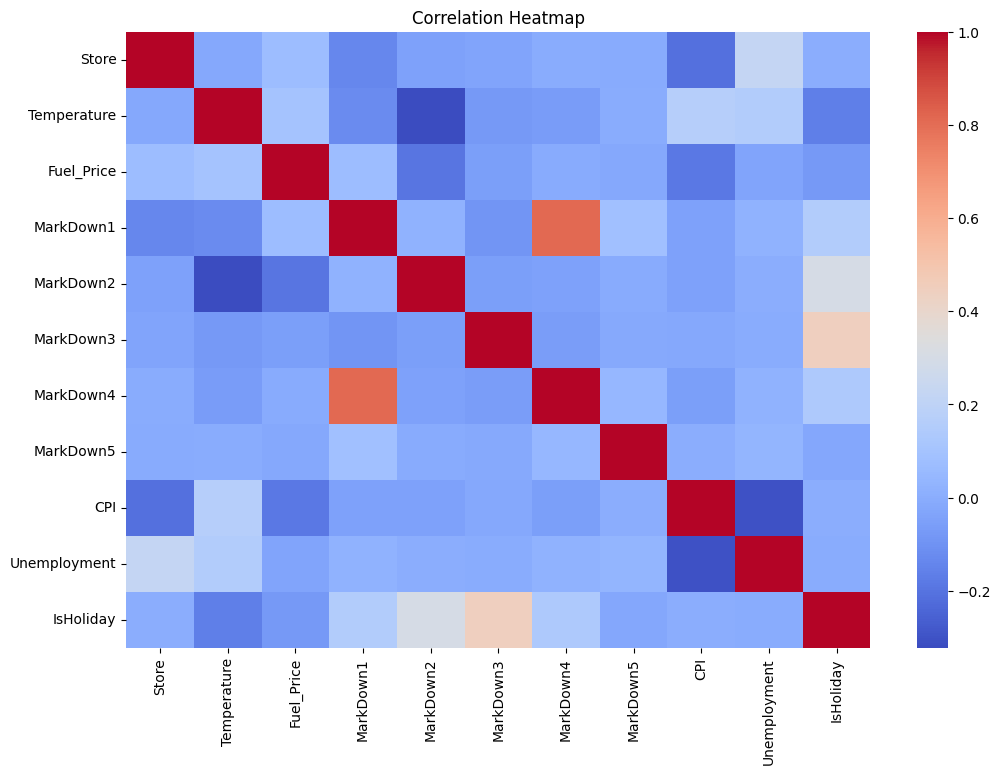

In [36]:
# Correlation heatmap
# ==========================
# Exploratory Data Analysis (EDA)
# ==========================

print("Type of df before EDA:", type(data))

print("----- CORRELATION HEATMAP -----")
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

if 'Date' in data.columns and 'Weekly_Sales' in data.columns:
    print("\n----- WEEKLY SALES TREND OVER TIME -----")
    plt.figure(figsize=(12,6))
    data.groupby('Date').mean(numeric_only=True)['Weekly_Sales'].plot()
    plt.title("Weekly Sales Over Time")
    plt.xlabel("Date")
    plt.ylabel("Average Weekly Sales")
    plt.show()

if 'Weekly_Sales' in data.columns:
    print("\n----- SALES DISTRIBUTION -----")
    plt.figure(figsize=(8,6))
    sns.histplot(data['Weekly_Sales'], bins=40, kde=True)
    plt.title("Distribution of Weekly Sales")
    plt.show()

if 'Store' in data.columns and 'Weekly_Sales' in data.columns:
    print("\n----- STORE-WISE SALES -----")
    plt.figure(figsize=(12,6))
    store_sales = data.groupby('Store')['Weekly_Sales'].mean().sort_values()
    store_sales.plot(kind='bar')
    plt.title("Average Weekly Sales per Store")
    plt.xlabel("Store")
    plt.ylabel("Average Sales")
    plt.show()

if 'IsHoliday' in data.columns and 'Weekly_Sales' in data.columns:
    print("\n----- HOLIDAY VS NON-HOLIDAY SALES -----")
    plt.figure(figsize=(8,6))
    sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=data)
    plt.title("Sales During Holidays vs Non-Holidays")
    plt.show()



## Model Training (if applicable)

In [ ]:
# Simple Linear Regression example if Weekly_Sales is present



## Conclusion
Summarize key findings and insights from the sales data analysis.